
# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd

#sales = pd.read_csv("iowa_liquor_sales_proj_2.csv")
sales = pd.read_csv("Iowa_Liquor_sales_sample_10pct.csv")
## Load the data into a DataFrame
# pd.read_csv()

## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sklearn.linear_model as skl
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score as roc_auc
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
def eda_tool(df):

    import pandas as pd
    
    dict_list = []
    for col in df.columns:
        data = df[col]
        dict_ = {}
        # The null count for a column. Columns with no nulls are generally more interesting
        dict_.update({"null_count" : data.isnull().sum()})
        # Counting the unique values in a column
        # This is useful for seeing how interesting the column might be as a feature
        dict_.update({"unique_count" : len(data.unique())})
        # Finding the types of data in the column
        # This is useful for finding out potential problems with a column having strings and ints
        dict_.update({"data_type" : set([type(d).__name__ for d in data])})
        #dict_.update({"score" : match[1]})
        dict_list.append(dict_)
    eda_df = pd.DataFrame(dict_list)
    eda_df.index = df.columns
    eda_df = eda_df.sort_values(['null_count','unique_count'], ascending=[True, False])

    print("dataframe shape \n", df.shape, '\n')
    print("dataframe index \n", df.index[:5], '\n')
    print("dataframe describe \n", df.describe())

    return eda_df

In [4]:
eda_tool(sales)

dataframe shape 
 (270955, 18) 

dataframe index 
 RangeIndex(start=0, stop=5, step=1) 

dataframe describe 
         Store Number  County Number      Category  Vendor Number  \
count  270955.000000  269878.000000  2.708870e+05   270955.00000   
mean     3590.263701      57.231642  1.043888e+06      256.43443   
std       947.662050      27.341205  5.018211e+04      141.01489   
min      2106.000000       1.000000  1.011100e+06       10.00000   
25%      2604.000000      31.000000  1.012200e+06      115.00000   
50%      3722.000000      62.000000  1.031200e+06      260.00000   
75%      4378.000000      77.000000  1.062310e+06      380.00000   
max      9023.000000      99.000000  1.701100e+06      978.00000   

         Item Number  Bottle Volume (ml)   Bottles Sold  Volume Sold (Liters)  \
count  270955.000000       270955.000000  270955.000000         270955.000000   
mean    45974.963300          924.830341       9.871285              8.981351   
std     52757.043086          493.

,data_type,null_count,unique_count
Sale (Dollars),{str},0,6580
Item Number,{int64},0,2696
Item Description,{str},0,2173
Store Number,{int64},0,1400
State Bottle Retail,{str},0,1112
State Bottle Cost,{str},0,1086
Zip Code,{str},0,415
City,{str},0,385
Date,{str},0,274
Volume Sold (Liters),{float64},0,265


In [5]:
sales.isnull().sum()

Invoice/Item Number          0
Date                         0
Store Number                 0
Store Name                   0
Address                      0
City                         0
Zip Code                     0
Store Location               0
County Number            10913
County                   10913
Category                   779
Category Name             6109
Vendor Number                0
Vendor Name                  0
Item Number                  0
Item Description             0
Pack                         0
Bottle Volume (ml)           0
State Bottle Cost            0
State Bottle Retail          0
Bottles Sold                 0
Sale (Dollars)               0
Volume Sold (Liters)         0
Volume Sold (Gallons)        0
dtype: int64

There are around 10,000 null values, as this data frame is 2.7 million rows I am dropping the null rows

In [5]:
sales = sales.dropna()

In [6]:
sales.duplicated().sum()

35

There are no duplicated rows

In [7]:
sales.columns

Index(['Date', 'Store Number', 'City', 'Zip Code', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Item Number',
       'Item Description', 'Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)',
       'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

Cleaning up the column names

In [8]:
sales.columns = map(str.lower, sales.columns)
sales.columns = sales.columns.str.replace(r"[()]", "")
sales.columns = sales.columns.str.replace(r"[ ]", "_")
sales.columns = sales.columns.str.replace(r"[/]", "_")

Cleaning the columns and switching them to the proper data type

In [9]:
for col in sales.select_dtypes([np.object]):
    sales[col] = sales[col].str.lstrip('$')

In [10]:
sales["state_bottle_retail"] = sales["state_bottle_retail"].astype(float)
sales["sale_dollars"] = sales["sale_dollars"].astype(float)

Exploring the requirements of the project (Build models of total sales based on location, price per bottle, 
total bottles sold. You may find it useful to build models for each county, ZIP code, or city.)  I will explore the following categories:  Total Sales, County, Zip Code, City, Retail Price per bottle, Total Bottles Sold.

In [11]:
sales.columns

Index(['date', 'store_number', 'city', 'zip_code', 'county_number', 'county',
       'category', 'category_name', 'vendor_number', 'item_number',
       'item_description', 'bottle_volume_ml', 'state_bottle_cost',
       'state_bottle_retail', 'bottles_sold', 'sale_dollars',
       'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')

In [12]:
#Counting Total Sales
sales["sale_dollars"].value_counts()

162.00      3468
148.56      2536
64.80       2066
94.20       2006
70.56       1889
90.00       1772
60.12       1711
73.80       1626
62.28       1624
117.00      1594
60.72       1556
188.88      1556
64.56       1548
180.00      1516
135.00      1511
45.00       1446
126.00      1433
30.00       1363
270.00      1311
161.64      1281
99.00       1260
72.00       1246
81.00       1228
124.20      1182
132.78      1052
58.50       1051
22.50       1004
24.76        992
67.26        982
40.50        979
            ... 
139.44         1
36392.40       1
90.90          1
45.70          1
71.05          1
4500.00        1
1398.42        1
575.82         1
584.94         1
314.64         1
114.06         1
2052.48        1
6285.96        1
291.12         1
1137.24        1
967.20         1
661.50         1
547.20         1
327.12         1
7927.20        1
230.94         1
537.60         1
753.72         1
7198.50        1
180.45         1
8.46           1
109.04         1
1079.04       

In [13]:
#Counting individual Counties
sales["county"].value_counts()

Polk             48944
Linn             23462
Scott            16630
Black Hawk       15030
Johnson          13163
Pottawattamie     9088
Story             8944
Woodbury          8541
Dubuque           7739
Cerro Gordo       6360
Des Moines        4082
Muscatine         3975
Clinton           3569
Wapello           3522
Dickinson         3409
Lee               3319
Webster           3144
Marshall          2984
Jasper            2828
Buena Vista       2737
Dallas            2707
Marion            2601
Warren            2460
Bremer            2240
Boone             2105
Poweshiek         2087
Clay              1917
Carroll           1911
Jones             1871
O'Brien           1720
                 ...  
Greene             675
Wright             671
Shelby             661
Ida                634
Howard             606
Humboldt           588
Adair              584
Grundy             566
Pocahontas         525
Mills              507
Louisa             484
Lucas              475
Chickasaw  

In [14]:
#Counting individual zip codes
sales["zip_code"].value_counts()

50010    7077
52402    6938
52240    6128
50613    5267
52001    4755
51501    4652
50314    4519
50317    4425
50265    4356
52404    4242
50401    4119
52722    3699
52807    3530
52405    3502
52241    3446
52761    3389
50311    3384
51503    3382
50320    3237
52501    3206
50702    3175
50315    3091
52804    2973
50501    2972
52601    2952
50703    2885
50322    2880
50266    2843
52732    2822
50158    2682
         ... 
52625      17
50514      17
50044      16
50541      16
52623      15
50542      15
51053      15
50261      15
51466      14
51002      14
50071      13
50251      12
50830      12
50150      11
52223      11
51005      11
51038      10
52337       9
51553       9
50452       8
51338       7
50162       6
50540       6
50061       6
50634       6
51535       5
51453       3
51530       3
52801       2
52328       2
Name: zip_code, Length: 412, dtype: int64

In [15]:
#Counting individual Cities
sales["city"].value_counts()

DES MOINES         23618
CEDAR RAPIDS       18736
DAVENPORT          11469
WATERLOO            8376
COUNCIL BLUFFS      8037
IOWA CITY           7938
SIOUX CITY          7888
AMES                7534
WEST DES MOINES     7148
DUBUQUE             6854
CEDAR FALLS         5719
ANKENY              4823
MASON CITY          4119
BETTENDORF          3699
CORALVILLE          3446
MUSCATINE           3389
BURLINGTON          3137
CLINTON             3077
FORT DODGE          2972
WINDSOR HEIGHTS     2797
MARSHALLTOWN        2682
NEWTON              2538
STORM LAKE          2522
MARION              2485
URBANDALE           2424
OTTUMWA             2290
JOHNSTON            2137
ALTOONA             2103
CLEAR LAKE          2080
SPENCER             1910
                   ...  
ARMSTRONG             17
DONNELLSON            17
GILMORE CITY          16
BUSSEY                16
GOLDFIELD             15
SCHALLER              15
DANVILLE              15
VAN METER             15
WASHBURN              15


In [16]:
#Counting individual bottle retail price
sales["state_bottle_retail"].value_counts()

12.38     6110
9.75      4783
13.50     4415
15.00     4222
22.50     3814
15.74     3809
10.76     2991
11.21     2944
7.50      2796
9.45      2777
10.50     2761
7.85      2618
17.24     2498
10.35     2473
11.24     2342
5.01      2334
11.43     2282
10.38     2227
12.30     2162
13.47     2142
5.06      2122
18.75     2116
16.50     2063
27.74     2051
7.13      2024
10.80     1928
5.25      1911
8.25      1869
27.00     1855
15.75     1740
          ... 
19.00        1
8.75         1
42.11        1
76.50        1
109.82       1
93.03        1
75.00        1
12.45        1
42.75        1
6.90         1
57.08        1
103.41       1
149.97       1
16.44        1
23.70        1
19.38        1
286.86       1
9.27         1
27.95        1
22.02        1
1.98         1
17.22        1
20.01        1
78.70        1
21.54        1
111.32       1
17.36        1
48.26        1
180.33       1
32.33        1
Name: state_bottle_retail, Length: 1104, dtype: int64

In [17]:
#Counting individual bottles sold
sales["bottles_sold"].value_counts()

12      72607
6       51887
2       37321
1       31058
3       27758
4       15051
24      14798
48       3765
5        3189
36       2115
18       1734
10       1383
8        1227
60       1098
30        591
72        488
7         397
120       379
96        302
84        200
9         168
144       151
15        117
180       108
42        107
240       107
300       100
90         89
150        86
44         66
        ...  
1116        1
157         1
372         1
2400        1
88          1
354         1
594         1
81          1
615         1
504         1
588         1
75          1
840         1
1128        1
624         1
57          1
282         1
1080        1
378         1
564         1
816         1
390         1
396         1
39          1
37          1
97          1
402         1
28          1
1050        1
33          1
Name: bottles_sold, Length: 136, dtype: int64

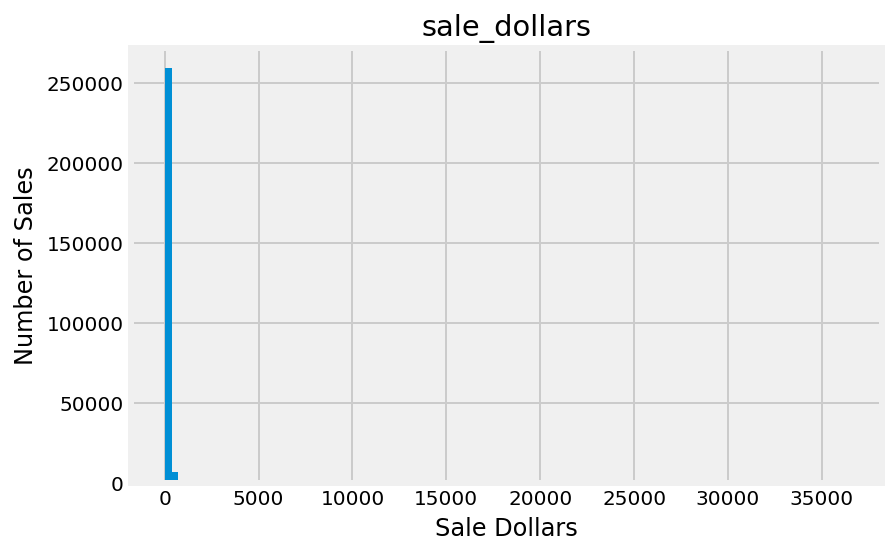

In [18]:
#Most sales are under 1,000 dollars
pd.DataFrame.hist(sales, column='sale_dollars', bins=100)
plt.xlabel('Sale Dollars')
plt.ylabel('Number of Sales')

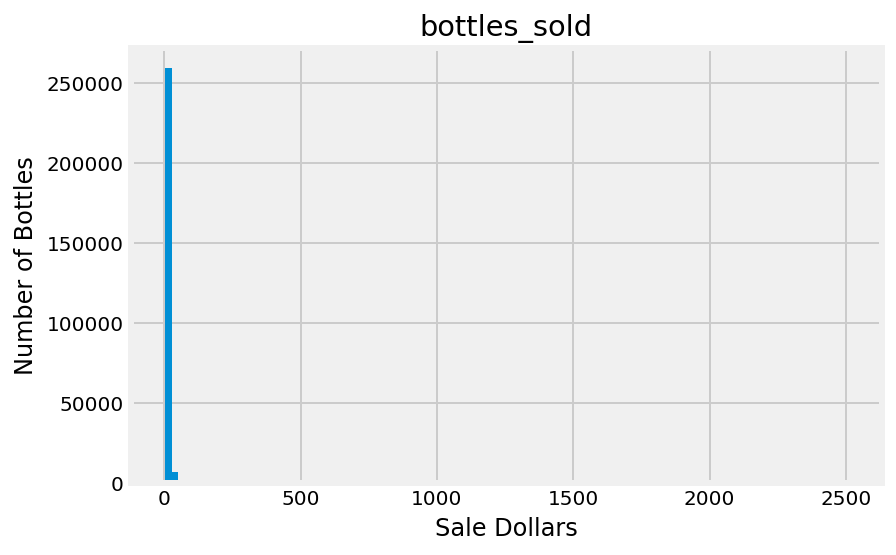

In [19]:
#Most bottles sold are under quantity of 100
pd.DataFrame.hist(sales, column='bottles_sold', bins=100)
plt.xlabel('Sale Dollars')
plt.ylabel('Number of Bottles')

# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.
 


In [20]:
variables = sales[['state_bottle_retail', 'bottles_sold', 'sale_dollars']]
variables.head()

,state_bottle_retail,bottles_sold,sale_dollars
0,6.75,12,81.00
1,20.63,2,41.26
2,18.89,24,453.36
3,14.25,6,85.50
4,10.80,12,129.60


In [21]:
dummy_counties = pd.get_dummies(sales.county)
dummy_counties.head()

,Adair,Adams,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,Buchanan,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
dummy_city = pd.get_dummies(sales.city)
dummy_city.head()

,ACKLEY,ADAIR,ADEL,AFTON,AKRON,ALBIA,ALDEN,ALGONA,ALLISON,ALTA,...,WEST UNION,WHEATLAND,WILLIAMSBURG,WILTON,WINDSOR HEIGHTS,WINTERSET,WINTHROP,WOODBINE,WOODWARD,ZWINGLE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
dummy_zip = pd.get_dummies(sales.zip_code)
dummy_zip.head()

,50002,50003,50006,50009,50010,50014,50020,50021,50022,50023,...,52777,52778,52801,52802,52803,52804,52806,52807,56201,712-2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

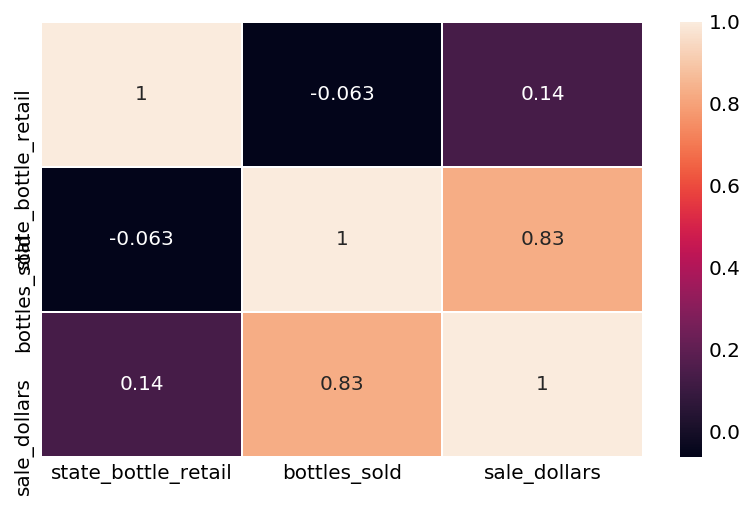

In [24]:
sns.heatmap(variables.corr(), annot = True, linewidths = 0.5)

There appears to be a correlation between bottles sold and sale dollars

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

I am going to start prepping my data to go into the model.  I will need to drop polk county since in the eda I found that it was the largest contributor to counties and since I added dummy variables I need to remove the most represented county then add a constant.

In [25]:
dummy_counties.columns

Index(['Adair', 'Adams', 'Allamakee', 'Appanoose', 'Audubon', 'Benton',
       'Black Hawk', 'Boone', 'Bremer', 'Buchanan', 'Buena Vista', 'Butler',
       'Calhoun', 'Carroll', 'Cass', 'Cedar', 'Cerro Gordo', 'Cherokee',
       'Chickasaw', 'Clarke', 'Clay', 'Clayton', 'Clinton', 'Crawford',
       'Dallas', 'Davis', 'Decatur', 'Delaware', 'Des Moines', 'Dickinson',
       'Dubuque', 'Emmet', 'Fayette', 'Floyd', 'Franklin', 'Fremont', 'Greene',
       'Grundy', 'Guthrie', 'Hamilton', 'Hancock', 'Hardin', 'Harrison',
       'Henry', 'Howard', 'Humboldt', 'Ida', 'Iowa', 'Jackson', 'Jasper',
       'Jefferson', 'Johnson', 'Jones', 'Keokuk', 'Kossuth', 'Lee', 'Linn',
       'Louisa', 'Lucas', 'Lyon', 'Madison', 'Mahaska', 'Marion', 'Marshall',
       'Mills', 'Mitchell', 'Monona', 'Monroe', 'Montgomery', 'Muscatine',
       'O'Brien', 'Osceola', 'Page', 'Palo Alto', 'Plymouth', 'Pocahontas',
       'Polk', 'Pottawattamie', 'Poweshiek', 'Ringgold', 'Sac', 'Scott',
       'Shelby', 'Sioux',

In [26]:
dummy_counties = dummy_counties.drop('Polk', axis=1)
variables = variables.drop('sale_dollars', axis=1)

In [27]:
sales_county = pd.concat([variables, dummy_counties], axis=1)
sales_county.head()

,state_bottle_retail,bottles_sold,Adair,Adams,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
0,6.75,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20.63,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.89,24,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,14.25,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.80,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
dummy_city = dummy_city.drop('DES MOINES', axis=1)
dummy_zip = dummy_zip.drop('50010', axis=1)


In [29]:
sales_city = pd.concat([variables, dummy_city], axis=1)
sales_city.head()

,state_bottle_retail,bottles_sold,ACKLEY,ADAIR,ADEL,AFTON,AKRON,ALBIA,ALDEN,ALGONA,...,WEST UNION,WHEATLAND,WILLIAMSBURG,WILTON,WINDSOR HEIGHTS,WINTERSET,WINTHROP,WOODBINE,WOODWARD,ZWINGLE
0,6.75,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20.63,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.89,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.25,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.80,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
sales_zip = pd.concat([variables, dummy_zip], axis=1)
sales_zip.head()

,state_bottle_retail,bottles_sold,50002,50003,50006,50009,50014,50020,50021,50022,...,52777,52778,52801,52802,52803,52804,52806,52807,56201,712-2
0,6.75,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20.63,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,18.89,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.25,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.80,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y=sales["sale_dollars"]
sales_county = sm.add_constant(sales_county)
X_county = sales_county
sales_city = sm.add_constant(sales_city)
X_city = sales_city
sales_zip = sm.add_constant(sales_zip)
X_zip = sales_zip

In [59]:
# Note the argument order
model_county = sm.OLS(y, X_county).fit() ## sm.OLS(output, input)
predictions_county = model_county.predict(X_county)

In [60]:
# Note the argument order
model_city = sm.OLS(y, X_city).fit() ## sm.OLS(output, input)
predictions_city = model_city.predict(X_city)

In [61]:
# Note the argument order
model_zip = sm.OLS(y, X_zip).fit() ## sm.OLS(output, input)
predictions_zip = model_zip.predict(X_zip)

In [62]:
# County statistics
model_county.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sale_dollars   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     6854.
Date:                Sun, 22 Oct 2017   Prob (F-statistic):               0.00
Time:                        22:31:25   Log-Likelihood:            -1.8135e+06
No. Observations:              269258   AIC:                         3.627e+06
Df Residuals:                  269157   BIC:                         3.628e+06
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -103.7964      1.105    -93.925      0.000    -105.962    -101.630
state_bottle_retail     6.8393      0.037    183.278      0.000       6.766       6.912
bottles_sold           13.3495      0.016    813.993      0.000      13.317      13.382
Adair                  -3.0402      8.478     -0.359      0.720     -19.657      13.577
Adams                  -1.8369     13.347     -0.138      0.891     -27.996      24.322
Allamakee               0.9446      6.371      0.148      0.882     -11.542      13.431
Appanoose              -4.2531      6.383     -0.666      0.505     -16.763       8.257
Audubon                 1.0510     13.550      0.078      0.938     -25.506      27.608
Benton                  1.6322      6.578      0.248      0.804     -11.261      14.525
Black Hawk            -17.3436      1.900     -9.129      0.000     -21.067     -13.620
Boone                   5.4154      4.534      1.194      0.232      -3.472      14.302
Bremer                  3.3418      4.401      0.759      0.448      -5.285      11.969
Buchanan                1.5694      5.172      0.303      0.762      -8.567      11.706
Buena Vista            -2.2199      4.002     -0.555      0.579     -10.063       5.623
Butler                  4.1962     10.200      0.411      0.681     -15.796      24.188
Calhoun                 8.1722      9.935      0.823      0.411     -11.299      27.644
Carroll                18.1781      4.749      3.828      0.000       8.870      27.486
Cass                    2.6457      5.976      0.443      0.658      -9.066      14.358
Cedar                   7.5866      6.345      1.196      0.232      -4.850      20.023
Cerro Gordo            -4.8350      2.715     -1.781      0.075     -10.157       0.487
Cherokee              -12.0638      6.939     -1.739      0.082     -25.664       1.536
Chickasaw               7.7258      9.500      0.813      0.416     -10.894      26.346
Clarke                 12.8217      7.786      1.647      0.100      -2.439      28.082
Clay                    1.3912      4.743      0.293      0.769      -7.904      10.687
Clayton                 0.9740      5.812      0.168      0.867     -10.418      12.366
Clinton                -0.7251      3.532     -0.205      0.837      -7.648       6.198
Crawford                3.9955      6.160      0.649      0.517      -8.079      16.070
Dallas                 53.1908      4.021     13.227      0.000      45.309      61.073
Davis                   4.6525     14.325      0.325      0.745     -23.424      32.729
Decatur                -2.2049     13.670     -0.161      0.872     -28.998      24.588
Delaware                3.1519      7.758      0.406      0.685     -12.054      18.358
Des Moines             -5.8023      3.318     -1.749      0.080     -12.306       0.702
Dic

In [63]:
# City Statistics
model_city.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sale_dollars   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     1791.
Date:                Sun, 22 Oct 2017   Prob (F-statistic):               0.00
Time:                        22:32:18   Log-Likelihood:            -1.8133e+06
No. Observations:              269258   AIC:                         3.627e+06
Df Residuals:                  268874   BIC:                         3.631e+06
Df Model:                         383                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -111.2714      1.465    -75.970      0.000    -114.142    -108.401
state_bottle_retail     6.8100      0.037    181.877      0.000       6.737       6.883
bottles_sold           13.3641      0.016    812.038      0.000      13.332      13.396
ACKLEY                 12.6694     21.388      0.592      0.554     -29.250      54.589
ADAIR                 -16.2146     31.082     -0.522      0.602     -77.134      44.705
ADEL                   21.9562     11.496      1.910      0.056      -0.576      44.488
AFTON                   9.7649     58.798      0.166      0.868    -105.478     125.007
AKRON                   7.8456     24.550      0.320      0.749     -40.273      55.964
ALBIA                  13.9177     11.107      1.253      0.210      -7.852      35.688
ALDEN                   4.5391     18.484      0.246      0.806     -31.689      40.768
ALGONA                 10.4988      6.497      1.616      0.106      -2.236      23.233
ALLISON                16.4433     22.391      0.734      0.463     -27.443      60.329
ALTA                  -16.2747     54.439     -0.299      0.765    -122.973      90.424
ALTOONA                 9.2230      4.634      1.990      0.047       0.140      18.306
AMES                   12.1338      2.696      4.501      0.000       6.850      17.418
ANAMOSA                16.3067      8.538      1.910      0.056      -0.427      33.040
ANITA                  10.1520     16.791      0.605      0.545     -22.759      43.063
ANKENY                 17.5795      3.219      5.461      0.000      11.270      23.889
ANTHON                 13.1279     15.957      0.823      0.411     -18.147      44.403
ARLINGTON              28.7329     23.397      1.228      0.219     -17.125      74.591
ARMSTRONG             -28.7348     49.406     -0.582      0.561    -125.568      68.099
ARNOLD'S PARK           1.3154     13.158      0.100      0.920     -24.475      27.106
ARNOLDS PARK           11.8707      9.231      1.286      0.198      -6.221      29.963
ATLANTIC               10.5251      6.462      1.629      0.103      -2.139      23.190
AUDUBON                12.3132     14.284      0.862      0.389     -15.684      40.310
AURELIA                -6.9803     61.411     -0.114      0.910    -127.344     113.384
AVOCA                  11.3464      9.618      1.180      0.238      -7.505      30.197
BALDWIN               -19.7364     39.957     -0.494      0.621     -98.052      58.579
BANCROFT                8.9044     10.655      0.836      0.403     -11.980      29.789
BAXTER                 20.9895     26.772      0.784      0.433     -31.482      73.461
BEDFORD                17.5580     16.306      1.077      0.282     -14.402      49.518
BELLE PLAINE            4.5213     10.096      0.448      0.654     -15.267      24.309
BEL

In [64]:
# Zip Code Statistics
model_zip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sale_dollars   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     1670.
Date:                Sun, 22 Oct 2017   Prob (F-statistic):               0.00
Time:                        22:32:28   Log-Likelihood:            -1.8128e+06
No. Observations:              269258   AIC:                         3.626e+06
Df Residuals:                  268844   BIC:                         3.631e+06
Df Model:                         413                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -96.5788      2.494    -38.719      0.000    -101.468     -91.690
state_bottle_retail     6.7432      0.038    179.585      0.000       6.670       6.817
bottles_sold           13.3491      0.017    808.482      0.000      13.317      13.381
50002                 -29.9087     31.092     -0.962      0.336     -90.848      31.030
50003                   8.2845     11.652      0.711      0.477     -14.554      31.123
50006                  -8.8378     18.561     -0.476      0.634     -45.216      27.541
50009                  -4.3451      5.048     -0.861      0.389     -14.240       5.550
50014                 -22.4837      9.811     -2.292      0.022     -41.712      -3.255
50020                  -3.5390     16.882     -0.210      0.834     -36.628      29.550
50021                  19.1865      4.715      4.069      0.000       9.945      28.428
50022                  -3.0223      6.759     -0.447      0.655     -16.269      10.225
50023                 -12.3539      4.878     -2.533      0.011     -21.914      -2.794
50025                  -1.3936     14.401     -0.097      0.923     -29.619      26.832
50028                   7.1533     26.799      0.267      0.790     -45.373      59.679
50033                   0.1676     23.753      0.007      0.994     -46.387      46.722
50035                   4.8937     10.940      0.447      0.655     -16.548      26.336
50036                   0.6791      5.877      0.116      0.908     -10.839      12.197
50044                -154.1943     50.875     -3.031      0.002    -253.907     -54.481
50046                   7.6630     28.565      0.268      0.788     -48.324      63.650
50047                  -5.8497     15.301     -0.382      0.702     -35.839      24.140
50048                 -31.6252     33.504     -0.944      0.345     -97.292      34.042
50049                  -0.3689      9.634     -0.038      0.969     -19.252      18.514
50054                  -0.8693     14.868     -0.058      0.953     -30.010      28.271
50056                 -21.3511     39.193     -0.545      0.586     -98.168      55.465
50058                 -10.8854     18.867     -0.577      0.564     -47.865      26.094
50060                 -11.7605     17.990     -0.654      0.513     -47.021      23.500
50061                -141.0714     83.019     -1.699      0.089    -303.786      21.643
50069                  -6.6335     17.856     -0.371      0.710     -41.631      28.364
50071                 -22.8323     56.427     -0.405      0.686    -133.428      87.763
50072                  -2.4535     33.504     -0.073      0.942     -68.120      63.213
50075                   7.8137     21.330      0.366      0.714     -33.992      49.619
50076                 -37.6038     43.403     -0.866      0.386    -122.673      47.466
501

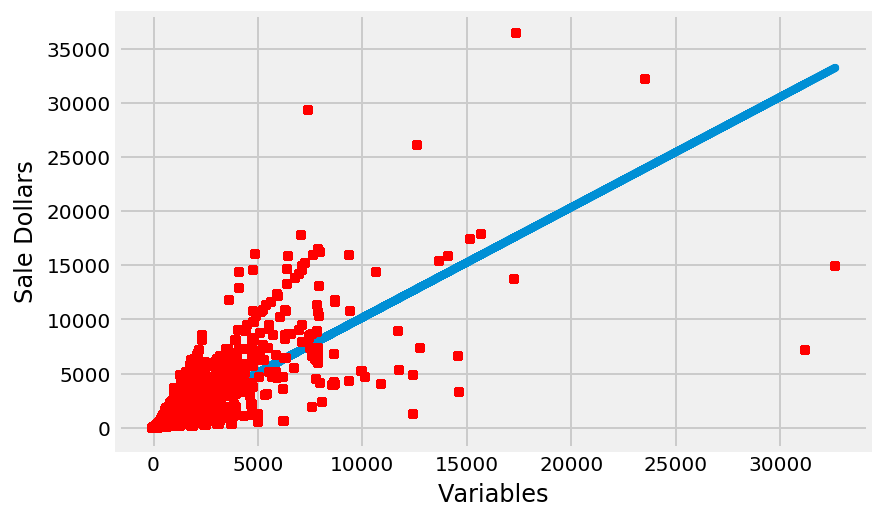

MSE: 325336187.622


In [42]:
#County Scatterplot
plt.scatter(predictions_county, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Variables")
plt.ylabel("Sale Dollars")
plt.plot(predictions_county, np.poly1d(np.polyfit(predictions_county, y, 1))(predictions_county))
plt.show()
print("MSE:", model_county.mse_model) ## mean squared error

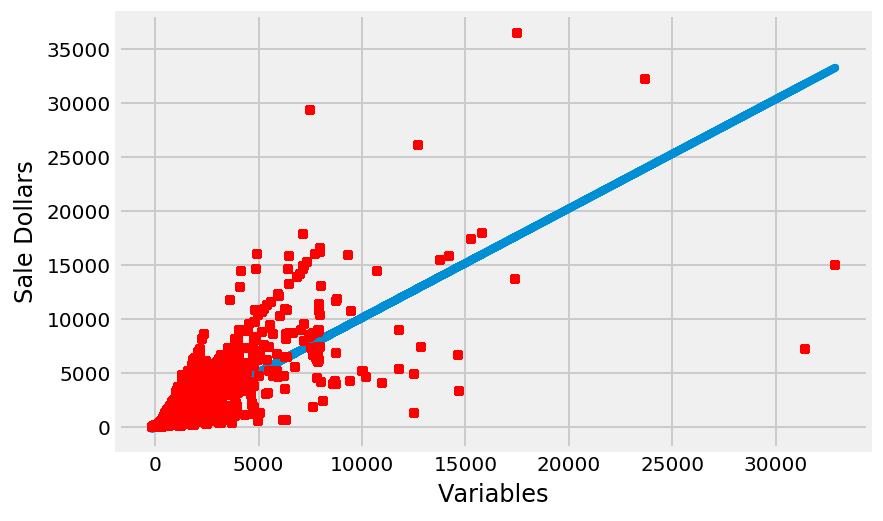

MSE: 85316215.6492


In [43]:
#City Scatterplot
plt.scatter(predictions_city, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Variables")
plt.ylabel("Sale Dollars")
plt.plot(predictions_city, np.poly1d(np.polyfit(predictions_city, y, 1))(predictions_city))
plt.show()
print("MSE:", model_city.mse_model) ## mean squared error

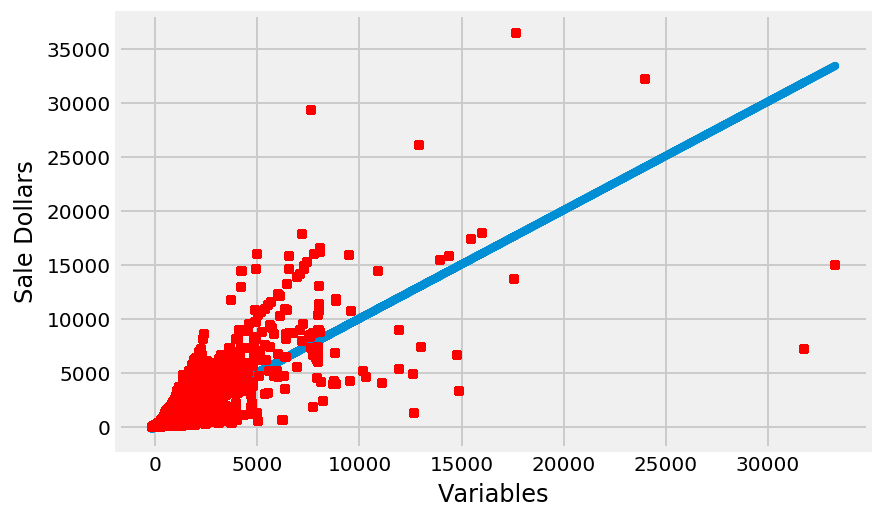

MSE: 79648697.4319


In [44]:
#Zip Code Scatterplot
plt.scatter(predictions_zip, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Variables")
plt.ylabel("Sale Dollars")
plt.plot(predictions_zip, np.poly1d(np.polyfit(predictions_zip, y, 1))(predictions_zip))
plt.show()
print("MSE:", model_zip.mse_model) ## mean squared error

In the graph above bottles retail and bottles sold are still in a linear configuration.

In [45]:
# Split my data into training and test.
x_train_county, x_test_county, y_train_county, y_test_county = train_test_split(X_county, y, test_size = 0.3, random_state = 1234)
x_train_county = sm.add_constant(x_train_county)
x_test_county = sm.add_constant(x_test_county)

In [46]:
# Split my data into training and test.
x_train_city, x_test_city, y_train_city, y_test_city = train_test_split(X_city, y, test_size = 0.3, random_state = 1234)
x_train_city = sm.add_constant(x_train_city)
x_test_city = sm.add_constant(x_test_city)

In [47]:
# Split my data into training and test.
x_train_zip, x_test_zip, y_train_zip, y_test_zip = train_test_split(X_zip, y, test_size = 0.3, random_state = 1234)
x_train_zip = sm.add_constant(x_train_zip)
x_test_zip = sm.add_constant(x_test_zip)

In [71]:
print(x_train.shape)
print(x_test.shape)
print(X.shape)
print(y_train.shape)
print(y_test.shape)
print(y.shape)


(1884821, 101)
(807781, 101)
(2692602, 100)
(1884821,)
(807781,)
(2692602,)


In [48]:
#County 
lm = linear_model.LinearRegression()
model_lin_county = lm.fit(x_train_county, y_train_county)
predictions_county = lm.predict(x_test_county)

In [49]:
#City 
lm = linear_model.LinearRegression()
model_lin_city = lm.fit(x_train_city, y_train_city)
predictions_city = lm.predict(x_test_city)

In [50]:
#Zip Code
lm = linear_model.LinearRegression()
model_lin_zip = lm.fit(x_train_zip, y_train_zip)
predictions_zip = lm.predict(x_test_zip)

Creating a kfolds cross validation test

In [51]:
#County
scores_county = cross_val_score(model_lin_county, x_train_county, y_train_county, cv=5)
print("Cross validated scores:", scores_county)
print("Average: ", scores_county.mean())

Cross validated scores: [ 0.75449393  0.74423201  0.72962293  0.71827552  0.72573546]
Average:  0.734471967462


In [52]:
#City
scores_city = cross_val_score(model_lin_city, x_train_city, y_train_city, cv=5)
print("Cross validated scores:", scores_city)
print("Average: ", scores_city.mean())

Cross validated scores: [  7.54656701e-01   7.44332737e-01   7.30246737e-01   7.18273801e-01
  -8.12869612e+05]
Average:  -162573.332904


In [53]:
#Zip Codes
scores_zip = cross_val_score(model_lin_zip, x_train_zip, y_train_zip, cv=5)
print("Cross validated scores:", scores_zip)
print("Average: ", scores_zip.mean())

Cross validated scores: [ 0.75582441  0.74495646  0.73070775  0.71923674  0.72683249]
Average:  0.735511569804


# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

Testing Model:

Cross Predicted Accuracy: 0.715240830688


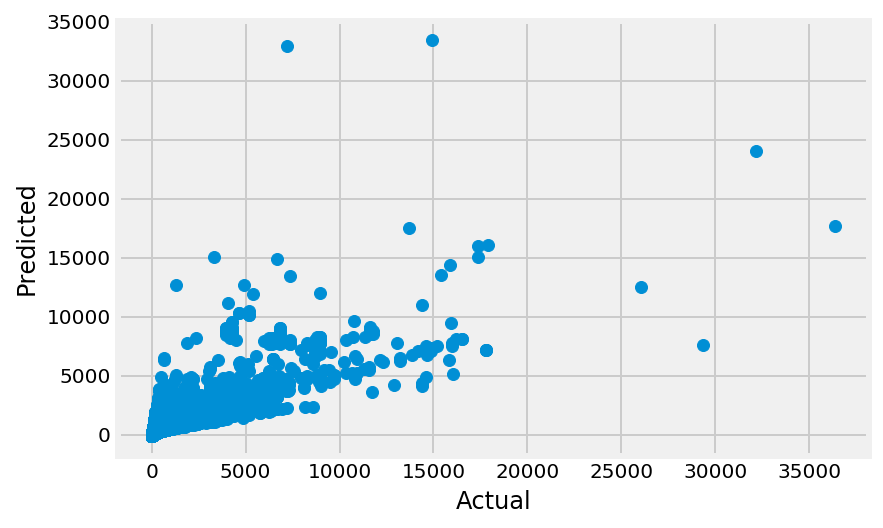

In [54]:
#County
predictions_county = cross_val_predict(model_lin_county, X_county, y, cv=5)
plt.scatter(y, predictions_county)
plt.xlabel('Actual')
plt.ylabel('Predicted')
accuracy_county = metrics.r2_score(y, predictions_county)
print("Cross Predicted Accuracy:", accuracy_county)

Cross Predicted Accuracy: -2.77554534782e+13


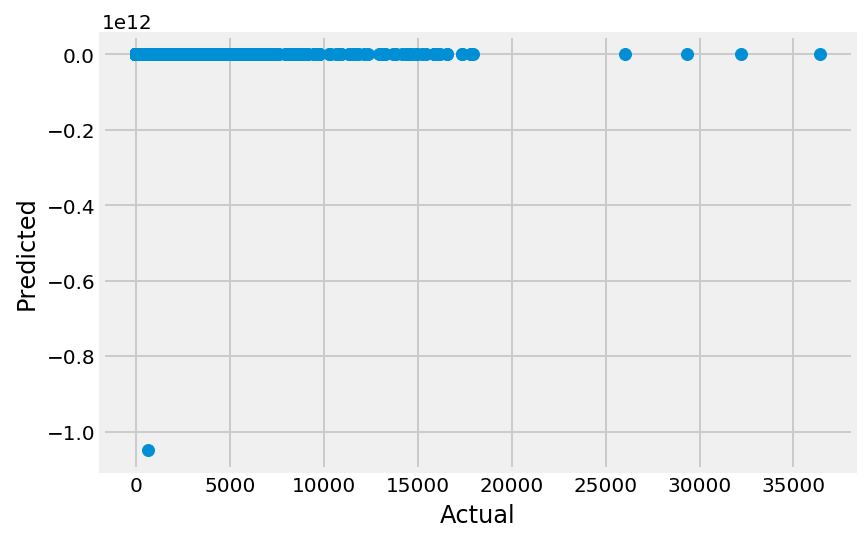

In [55]:
#City
predictions_city = cross_val_predict(model_lin_city, X_city, y, cv=5)
plt.scatter(y, predictions_city)
plt.xlabel('Actual')
plt.ylabel('Predicted')
accuracy_city = metrics.r2_score(y, predictions_city)
print("Cross Predicted Accuracy:", accuracy_city)

Cross Predicted Accuracy: 0.716408801447


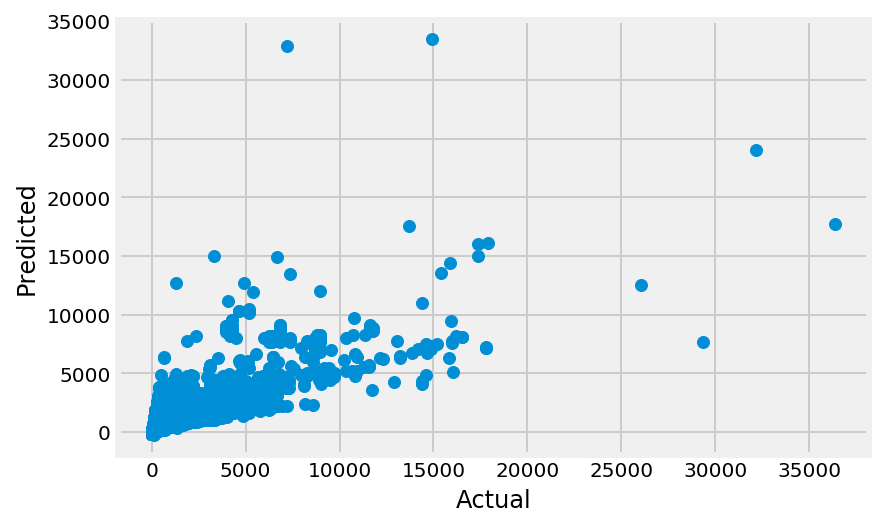

In [56]:
#Zip Code
predictions_zip = cross_val_predict(model_lin_zip, X_zip, y, cv=5)
plt.scatter(y, predictions_zip)
plt.xlabel('Actual')
plt.ylabel('Predicted')
accuracy_zip = metrics.r2_score(y, predictions_zip)
print("Cross Predicted Accuracy:", accuracy_zip)

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

This report provides an analysis and evaluation of the 3 best location within Iowa to build a liquor store.  The methods of analysis were putting together linear regression models and running them through a K folds cross validation test.  The specific things we were interested in measuring was sale price, number of bottles sold, and bottle retail price.  We then separated all variables by County, City, and Zip Code.  After running the initial tests we decided to drop city and continue the test via Zip Code and County.  

The top 5 counties with the best sales/ bottle ratio for their size were Dallas County, Carroll County, Sioux County, Iowa County, Howard County.  The top five zip codes were 50266, 52338, 50320, 52154, 50021.  Since zip code 52388 has a winery that is responsible for a majority of the sale we will be dropping it from this list which leaves us with the top three zip codes 50266, 50320, 52154.  My first suggestion for a new liquor store would be in 50266.  

Additional information that would be needed to perform a more detailed analysis and provide a more accurate location within the zip code would be demographics and population data.  With the additional information we should be able to narrow down the location to within a few blocks.
